In [12]:
import numpy as np
from numpy import array, shape, zeros, fabs
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def Gauss_Elimination(A, B):
    g = np.shape(A)
    n = g[0]
    if g[0] != g[1]:
        print("La matriz no es cuadrada")
        return
    if n != int(np.shape(B)[0]):
        print("El vector debe tener la misma n de dimension n*1, que la matriz de ecuaciones n*n")
    for k in range(n-1):
        if fabs(A[k,k]) == 0:
            for i in range(k+1,n):
                if fabs(A[i,k]) > fabs(A[k,k]):
                    A[[k,i]] = A[[i,k]]
                    B[[k,i]] = B[[i,k]]
                    break
        for i in range(k+1, n):
            if A[i,k] == 0: continue
            factor = A[k,k]/A[i,k]
            for j in range(k,n):
                A[i,j] = A[k,j] - A[i,j]*factor
            B[i] = B[k] - B[i]*factor
    return A,B

In [4]:
def Solve_BackSubstitutionGauss(A, B):
    #Gauss-Elimination
    g = np.shape(A)
    n = g[0]
    x = zeros(n,float)
    if g[0] != g[1]:
        print("La matriz no es cuadrada")
        return
    if n != int(np.shape(B)[0]):
        print("El vector debe tener la misma n de dimension n*1, que la matriz de ecuaciones n*n")
    for k in range(n-1):
        if fabs(A[k,k]) == 0:
            for i in range(k+1,n):
                if fabs(A[i,k]) > fabs(A[k,k]):
                    A[[k,i]] = A[[i,k]]
                    B[[k,i]] = B[[i,k]]
                    break
        for i in range(k+1, n):
            if A[i,k] == 0: continue
            factor = A[k,k]/A[i,k]
            for j in range(k,n):
                A[i,j] = A[k,j] - A[i,j]*factor
            B[i] = B[k] - B[i]*factor
    #Back-Substitution
    x[n-1] = B[n-1] / A[n-1,n-1]
    for i in range(n-2, -1, -1):
        sum_Ax = 0
        for j in range(i+1,n):
            sum_Ax += A[i,j]*x[j]
        x[i] = (B[i] - sum_Ax) / A[i,i]
    return x

In [5]:
def jacobi(A, b, x0, d = 0.05, n=5):
    D = np.diag(np.diag(A))
    LU = A - D
    x = x0
    for i in range(n):
        D_inv = np.linalg.inv(D)
        xTemp = x
        x = np.dot(D_inv, np.dot(-(LU), x) + b)
        print('paso:', i, '-x: ', x)
        if np.linalg.norm(x - xTemp) <= d:
            return x
    return x

In [6]:
def es_Diag_Dom(A):
    abs_A = np.abs(A)
    return np.all( 2*np.diag(abs_A) >= np.sum(abs_A, axis=1) )
def gauss_seidel(A, b, x, N = 20 ,error = 1e-10):
    if es_Diag_Dom(A):
        for k in range(N):
            for i in range(len(b)):
                x[i] = (b[i] - np.sum(A[i][:i]*x[:i]) - np.sum(A[i][i+1:]*x[i+1:]))/A[i][i]
                
            e = np.linalg.norm(A@x-b)
            print("Iteracion #",k,x)
            if e < error:
                return x
                break
    else:
        print("La matriz debe de ser Diagonal Dominante")

# Finite Difference Method

In [7]:
def grid_xy(A, n, m):
    delta_x = (A[1] - A[0])/n
    delta_y = (A[3] - A[2])/m
    part_x = [0]*(n+1)
    part_y = [0]*(m+1)
    for i in range(n+1):
        part_x[i] = A[0] + i*(delta_x)
    for i in range(m+1):
        part_y[i] = A[2] + i*(delta_y)
    #return part_x, part_y
    B = np.zeros((m+1,n+1), dtype=float)
    for i in range(m+1):
        B[i][0] = 100*part_y[m-i]
        B[i][n] = 250*part_y[m-i]
    for j in range(n+1):
        B[0][j] = 200+(100/3)*(part_x[j])**2
        B[m][j] = 0
        
    #return np.array(part_x), np.array(part_y)
    return B,n-1, m-1
grid_xy([0,3,0,2], 4, 4)

(array([[200.  , 218.75, 275.  , 368.75, 500.  ],
        [150.  ,   0.  ,   0.  ,   0.  , 375.  ],
        [100.  ,   0.  ,   0.  ,   0.  , 250.  ],
        [ 50.  ,   0.  ,   0.  ,   0.  , 125.  ],
        [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ]]),
 3,
 3)

In [8]:
def grid(A, n, m):
    delta_x = (A[1] - A[0])/n
    delta_y = (A[3] - A[2])/m
    part_x = [0]*(n+1)
    part_y = [0]*(m+1)
    for i in range(n+1):
        part_x[i] = A[0] + i*(delta_x)
    for i in range(m+1):
        part_y[i] = A[2] + i*(delta_y)
    #return part_x, part_y
    B = np.zeros((m+1,n+1), dtype=float)
    for i in range(m+1):
        B[i][0] = 100*part_y[m-i]
        B[i][n] = 250*part_y[m-i]
    for j in range(n+1):
        B[0][j] = 200+(100/3)*(part_x[j])**2
        B[m][j] = 0
    #return part_x, part_y, B
    return B,n-1, m-1
grid([0,3,0,2], 4, 4)

(array([[200.  , 218.75, 275.  , 368.75, 500.  ],
        [150.  ,   0.  ,   0.  ,   0.  , 375.  ],
        [100.  ,   0.  ,   0.  ,   0.  , 250.  ],
        [ 50.  ,   0.  ,   0.  ,   0.  , 125.  ],
        [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ]]),
 3,
 3)

In [11]:
Z = grid([0,3,0,2],4,4)
n=Z[1]
m=Z[2]
B =Z[0]
def matrix(n,m,B):
    r = n*m
    A = np.zeros((r,r),dtype=float)
    for i in range(r):
        for j in range(r):
            if i == j:
                A[i][j] = -4
            if i == j+1 and i%(m)!=0:
                A[i][j] = 1
                A[j][i] = 1
            if i == j+n:
                A[i][j] = 1
                A[j][i] = 1
    b = np.zeros((r,1), dtype=float)
    for i in range(r):
        o = i%n
        k = i//n
        #Esquina inferior izquierda
        if i == 0:
            b[i] = - (B[m+1][1] + B[m][0])
        #Los que no son esquina y son frontera inferior
        if 0<i and i < n-1:
            b[i] = -(B[m+1][i+1])
        #Esquina inferior derecha
        if i == n-1:
            b[i] = - (B[m+1][n] + B[m][n+1])
        #Esquina superior izquierda
        if i == (r-n):
            b[i] = - (B[1][0] + B[0][1])
        #Los que no son esquina y son frontera superior
        if (r-n) < i and i < (r-1):
            b[i] = -(B[0][o+1])
        #Esquina superior derecha
        if i == (r-1):
            b[i] = -(B[1][n+1]+B[0][n])
            
        if o == 0 and  i != 0 and i != (r-n):
            b[i] = -B[m-k][0]
        if o == n-1 and  i != n-1 and i != (r-1):
            b[i] = -B[m-k][n+1]
    return A , b
P = matrix(n,m,B)
A = P[0]
b = P[1]
#print(A,b)
def resolver_directo(A,b):
    T = Solve_BackSubstitutionGauss(A, b)
    #T =np.linalg.solve(A,b)
    T_r = np.around(T, decimals=1) 
    #return T_r
    q = 0
    for i in range(m):
        for j in range(n):   
            B[m-i][j+1] = T_r[q]
            q += 1
    return B
    

def resolver_iterativo(A,b):
    n = np.shape(A)[0]
    x = np.array([0]*n, dtype='f')
    gauss_seidel(A,b,x)
    #jacobi(A,b,x)
#print(P)
M = resolver_directo(A,b)
print(M)
#resolver_iterativo(A,b)

[[200.   218.75 275.   368.75 500.  ]
 [150.   180.3  226.7  292.8  375.  ]
 [100.   125.8  158.6  200.8  250.  ]
 [ 50.    64.2   81.1  101.7  125.  ]
 [  0.     0.     0.     0.     0.  ]]


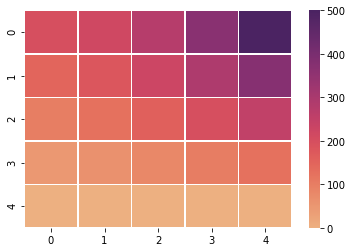

In [13]:
ax = sns.heatmap(M, cmap="flare",linewidth=0.5)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

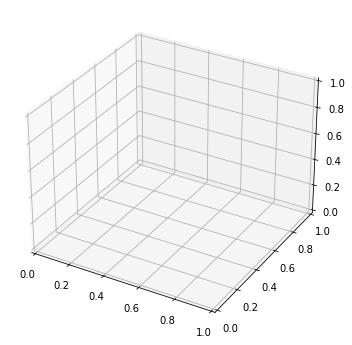

In [14]:
fig = plt.figure(figsize=(8,6))
ax3d = plt.axes(projection="3d")

xdata = grid_xy([0,3,0,2],4,4)[0]
ydata = grid_xy([0,3,0,2],4,4)[1]
X,Y = np.meshgrid(xdata,ydata)
Z = np.flip(M,0)

ax3d = plt.axes(projection='3d')
surf=ax3d.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap="flare")
fig.colorbar(surf, ax=ax3d)
ax3d.set_title('Surface Plot in Matplotlib')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')


plt.show()